In [0]:
import numpy as np
import matplotlib.pyplot as plt

Домашняя работа

In [0]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
import numpy as np
from matplotlib import pyplot as plt
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, printing=True):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    if printing:
      if i % (iterations / 10) == 0:
        print(i, W, err)
  return W

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

Lambda 0.1
Lambda 0.01
Lambda 0.001
Lambda 0.0001
Lambda 1e-05


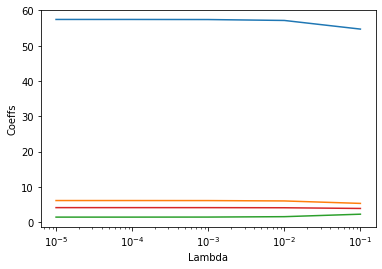

In [69]:
lambda_ = 1e-1
points = 5
weights = np.zeros((points, X_st.shape[0]))
lambdas = []
for i in range(points):
  print("Lambda", lambda_)
  weights[i] = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_, printing=False)
  lambdas.append(lambda_)
  lambda_/=10

plt.plot(lambdas, weights)
plt.xscale('log')
plt.ylabel('Coeffs')
plt.xlabel('Lambda')
plt.show()


2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет, так мы исказим значения наших features

3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [72]:

def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, printing=True):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2 * np.sign(W)) #производная от модуля будет |x|/x , то есть знак переменной. Также появляется lambda_/2 потому что мы использовали lambda_/2 при добавлении к f(x,W) 
    if printing:
      if i % (iterations / 10) == 0:
        print(i, W, err)
  return W

eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_)

500 [57.39766535  5.10794273  2.46013447  4.08693796] 39.98154848730532
1000 [57.39999965  5.76653136  1.85622314  4.03914627] 39.807122580612045
1500 [57.39999975  5.99153666  1.60432657  4.06912257] 39.782340658769705
2000 [57.39999975  6.07258423  1.50040888  4.09331586] 39.77848906004731
2500 [57.39999975  6.10298563  1.45781118  4.10606663] 39.777867718950596
3000 [57.39999975  6.1147208   1.44041495  4.11195705] 39.77776605547384
3500 [57.39999975  6.11933798  1.43332636  4.11452262] 39.777749334831995
4000 [57.39999975  6.12117697  1.43044171  4.11560677] 39.77774657960818
4500 [57.39999975  6.12191504  1.42926876  4.11605735] 39.777746125293405
5000 [57.39999975  6.12221265  1.42879203  4.11624284] 39.777746050361124


array([57.39999975,  6.12221265,  1.42879203,  4.11624284])